In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from pprint import pprint
import random
import matplotlib.pyplot as plt  

In [2]:
# using Eucledian distance
def Knn_classifier_EucledianDistance(train,row, k):
    #store {euclid sum , label} 
    my_dist = []
    l = len(row)
    count = 0
    for r in train[:,1:]:
        sum = 0
        for x in range(l):
            sum+=pow(row[x] - r[x],2)
            label = train [count][0]
        count+=1
        sum = math.sqrt(sum)
        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])

    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]
        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k


# using Manhatten distance
def Knn_classifier_ManhattenDistance(train,row, k):
    #store {euclid sum , label} 
    my_dist = []
    l = len(row)
    count = 0
    for r in train[:,1:]:
        sum = 0
        for x in range(l):
            sum+=abs(row[x] - r[x])
            label = train [count][0]
        count+=1
        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])

    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]
        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k


# using Bray-Curtis distance
def Knn_classifier_BrayCurtisDistance(train,row, k):
    #store {euclid sum , label} 
    my_dist = []
    l = len(row)
    count = 0
    for r in train[:,1:]:
        sum = 0
        for x in range(l):
            csum = abs(row[x] + r[x])
            sum+=abs(row[x] - r[x])/csum
            label = train [count][0]
        count+=1
        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])

    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]
        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k


In [3]:
def find_correct(myans , myvalidate):
    global correct,tp,tn,fp,fn
    a = myvalidate[:][0]

    if (myans == a):
        correct +=1

    return correct

In [4]:
df = pd.read_csv("Robot2", header=None, delimiter=r"\s+")
# validate = pd.read_csv("Robot1", header=None, delimiter=r"\s+")
train,validate = train_test_split(df, test_size = 0.2)
#remove last column from datas as insignificant
train = train.iloc[:, :-1]
validate = validate.iloc[:, :-1]

train1=train
val1=validate

train = train.values
myvalidate = validate.values

validate_arr = validate.iloc[:, 1:].astype(float)
validate_arr = validate_arr.values





no of test samples 25
Max_accuracy :  80.0 for k : 1

no of test samples 25
Max_accuracy :  84.0 for k : 2

no of test samples 25
Max_accuracy :  84.0 for k : 1


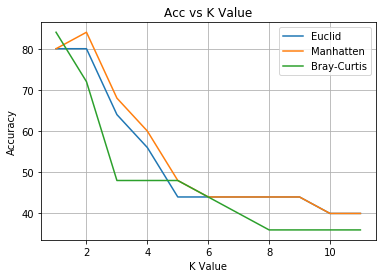

In [5]:
for dist_type in range(3):
    if(dist_type == 0):
        # finding the Accuracy using EucledianDistance
        acc_list = []
        correct = 0
        max_accuracy = 0
        k_for_max_acc = 0
        for i in range(1,12) :
            for row in range(len(validate_arr)):
                myans = Knn_classifier_EucledianDistance(train,validate_arr[row], i)
                corr = find_correct(myans , myvalidate[row]) 
            accu = (corr/float(len(validate_arr)))*100
            acc_list.append(accu)
            if(accu>max_accuracy):
                max_accuracy = accu
                k_for_max_acc = i
            correct = 0

        print("\nno of test samples", len(validate_arr))
        print("Max_accuracy : ",max_accuracy, "for k :",k_for_max_acc)

        plt.plot(range(1, 12), acc_list,label="Euclid")


    if(dist_type == 1):
        # finding the Accuracy using Knn_classifier_ManhattenDistance
        acc_list = []
        correct = 0
        max_accuracy = 0
        k_for_max_acc = 0
        for i in range(1,12) :
            for row in range(len(validate_arr)):
                myans = Knn_classifier_ManhattenDistance(train,validate_arr[row], i)
                corr = find_correct(myans , myvalidate[row]) 
            accu = (corr/float(len(validate_arr)))*100
            acc_list.append(accu)
            if(accu>max_accuracy):
                max_accuracy = accu
                k_for_max_acc = i
            correct = 0

        print("\nno of test samples", len(validate_arr))
        print("Max_accuracy : ",max_accuracy, "for k :",k_for_max_acc)

        plt.plot(range(1, 12), acc_list,label="Manhatten")

    if(dist_type == 2):
        # finding the Accuracy using Knn_classifier_BrayCurtisDistance
        acc_list = []
        correct = 0
        max_accuracy = 0
        k_for_max_acc = 0
        for i in range(1,12) :
            for row in range(len(validate_arr)):
                myans = Knn_classifier_BrayCurtisDistance(train,validate_arr[row], i)
                corr = find_correct(myans , myvalidate[row]) 
            accu = (corr/float(len(validate_arr)))*100
            acc_list.append(accu)
            if(accu>max_accuracy):
                max_accuracy = accu
                k_for_max_acc = i
            correct = 0

        print("\nno of test samples", len(validate_arr))
        print("Max_accuracy : ",max_accuracy, "for k :",k_for_max_acc)

#         plt.figure(figsize=(12, 6))  
        plt.plot(range(1, 12), acc_list,label="Bray-Curtis")
        plt.title('Acc vs K Value')  
        plt.xlabel('K Value')
        plt.grid(True)
        plt.ylabel('Accuracy')        
        plt.legend()
        plt.show()
        
        
        

In [6]:
y_train = train1.pop(0)
x_train = train1
y_test = val1.pop(0)
x_test = val1

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=15)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))




[[14  2]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

   micro avg       0.88      0.88      0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

0.88
